<a id="top"></a>

The purpose of this notebook is to create a dataset containing LINEID, ROUTEID, PROGRNUMBER & STOPPOINTID and to gain a better understanding of this data.

***

# Import Packages

In [33]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import json

***

<a id="contents"></a>
# Contents

- [1. Connect to Database](#connect_to_db)
- [2. Query Database](#query_db)
- [3. Data Overview](#data_overview)
- [4. A Look at Line 1](#look_at_line_1)
- [5. Create Stops Dictionary](#create_stops_dictionary)
- [6. Create Stops % Travel Time Dictionary](#stop_pct_dictionary)
- [7. Line Route IDs](#line_routes)
- [8. Stop Dwell Times](#stop_dwelltimes)

***

<a id="connect_to_db"></a>
# 1. Connect to Database
[Back to contents](#contents)

In [34]:
# def function to create connection to db
def create_connection(db_file):
    """
    create a database connection to the SQLite database specified by db_file
    :param df_file: database file
    :return: Connection object or None
    """
    conn = None
    try: 
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
        
    return conn

In [35]:
# create connection to database
db = '/home/faye/Data-Analytics-CityRoute/dublinbus.db'
conn = create_connection(db)

***

<a id="query_db"></a>
# 2. Query Database
[Back to contents](#contents)

In [36]:
# initialise query
query = """
SELECT DISTINCT T.LINEID, T.ROUTEID, T.DIRECTION, L.PROGRNUMBER, L.STOPPOINTID
FROM leavetimes L, trips T
WHERE L.TRIPID = T.TRIPID
"""

In [37]:
df_query = pd.read_sql(query, conn)

***

<a id="data_overview"></a>
# 3. Data Overview
[Back to contents](#contents)

In [38]:
# print number of rows
rows = df_query.shape[0]
print(f"There are {rows} rows in this dataset.")

There are 30649 rows in this dataset.


In [39]:
# print first 5 rows
print("The first 5 rows:")
df_query.head(5)

The first 5 rows:


,LINEID,ROUTEID,DIRECTION,PROGRNUMBER,STOPPOINTID
0,14,14_15,1,1,248
1,14,14_15,1,2,249
2,14,14_15,1,3,250
3,14,14_15,1,4,251
4,14,14_15,1,5,252


In [40]:
# print last 5 rows
print("The last 5 rows:")
df_query.tail(5)

The last 5 rows:


,LINEID,ROUTEID,DIRECTION,PROGRNUMBER,STOPPOINTID
30644,41X,41X_131,1,6,772
30645,41X,41X_131,1,7,773
30646,46A,46A_65,2,16,7688
30647,41,41_22,1,28,7685
30648,41B,41B_58,1,29,3671


In [41]:
# print feature datatypes
print("Feature datatypes")
print("-"*25)
print(df_query.dtypes)

Feature datatypes
-------------------------
LINEID         object
ROUTEID        object
DIRECTION       int64
PROGRNUMBER    object
STOPPOINTID    object
dtype: object


In [42]:
# change datatype of PROGRNUMBER
df_query['PROGRNUMBER'] = df_query['PROGRNUMBER'].astype('int64')
print(f"The datatype of PROGRNUMBER is now {df_query['PROGRNUMBER'].dtype}")

The datatype of PROGRNUMBER is now int64


In [43]:
# print the number of routes for each line
routes_per_line = {} #dictionary of lines and the number of routes they have
lines = df_query['LINEID'].unique()
lines.sort()
print("The number of routes for each line")
print("-"*50)
routes_total = 0
for line in lines:
    routes = df_query[df_query['LINEID'] == line]['ROUTEID'].unique()
    print(f"Line {line:3} has {len(routes):2} routes.")
    routes_total += len(routes)
    routes_per_line[line] = len(routes) #add details to dictionary

print()
print("-"*50)
print(f"There is an average of {routes_total // len(lines)} routes for each line.")

The number of routes for each line
--------------------------------------------------
Line 1   has  5 routes.
Line 102 has  3 routes.
Line 104 has  2 routes.
Line 11  has  4 routes.
Line 111 has  4 routes.
Line 114 has  2 routes.
Line 116 has  2 routes.
Line 118 has  2 routes.
Line 120 has  7 routes.
Line 122 has  8 routes.
Line 123 has  4 routes.
Line 13  has 18 routes.
Line 130 has  2 routes.
Line 14  has  4 routes.
Line 140 has  5 routes.
Line 142 has  5 routes.
Line 145 has 15 routes.
Line 14C has  3 routes.
Line 15  has  6 routes.
Line 150 has  3 routes.
Line 151 has  5 routes.
Line 15A has  3 routes.
Line 15B has  4 routes.
Line 15D has  3 routes.
Line 16  has  5 routes.
Line 161 has  3 routes.
Line 16C has  4 routes.
Line 16D has  1 routes.
Line 17  has 10 routes.
Line 17A has  8 routes.
Line 18  has  3 routes.
Line 184 has  2 routes.
Line 185 has 14 routes.
Line 220 has  4 routes.
Line 236 has  2 routes.
Line 238 has  3 routes.
Line 239 has  2 routes.
Line 25  has  2 routes.
Li

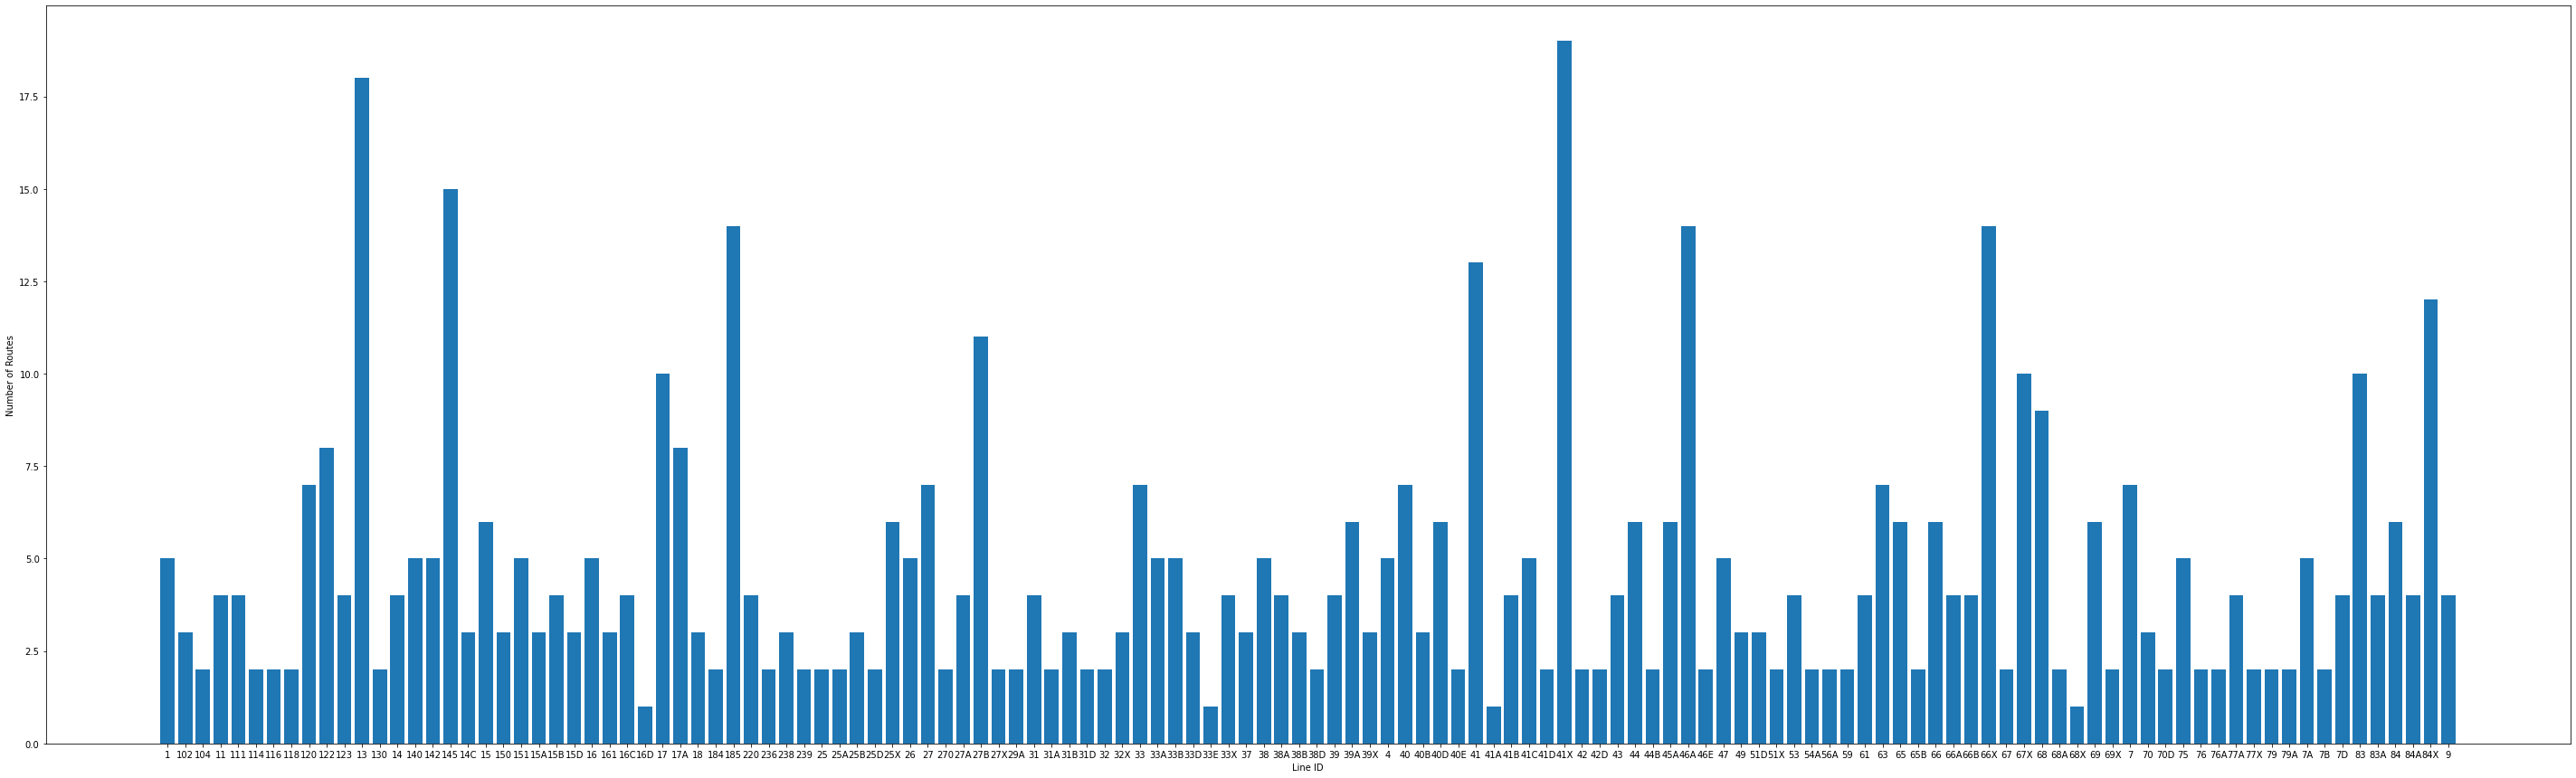

In [44]:
# plot number of routes per line
keys = routes_per_line.keys()
values = routes_per_line.values()

fig, ax = plt.subplots(figsize=(50, 15)) # set the size
plt.bar(keys, values)

ax.set_ylabel('Number of Routes')
ax.set_xlabel('Line ID')

fig.show()

> There are a few lines that have a significant number of routes but most appear to have around 4 routes.

In [45]:
# print details for each line
lines = df_query.sort_values('LINEID')['LINEID'].unique()
for line in lines:
    print()
    print(f"Line {line:3}")
    
    routes = df_query[df_query['LINEID'] == line]['ROUTEID'].unique()
    num_routes = len(routes)
    print(f"\tThis line has {num_routes} routes.")
    
    for route in routes:
        #print()
        print(f"\tRoute: {route:6}")
        print(f"\t\tDirection: {df_query[df_query['ROUTEID'] == route]['DIRECTION'].unique()}")
        stops = df_query[df_query['ROUTEID'] == route]['STOPPOINTID'].to_list()
        print(f"\t\tThis routes has {len(stops):2} stops")
        #print(f"\t\tStops: {stops}")
    
    print("~"*50)


Line 1  
	This line has 5 routes.
	Route: 1_40  
		Direction: [2]
		This routes has 43 stops
	Route: 1_37  
		Direction: [1]
		This routes has 42 stops
	Route: 1_39  
		Direction: [1]
		This routes has 23 stops
	Route: 1_41  
		Direction: [2]
		This routes has 22 stops
	Route: 1_38  
		Direction: [1]
		This routes has 21 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 102
	This line has 3 routes.
	Route: 102_10
		Direction: [2]
		This routes has 31 stops
	Route: 102_8 
		Direction: [1]
		This routes has 53 stops
	Route: 102_9 
		Direction: [2]
		This routes has 54 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 104
	This line has 2 routes.
	Route: 104_15
		Direction: [1]
		This routes has 56 stops
	Route: 104_16
		Direction: [2]
		This routes has 47 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 11 
	This line has 4 routes.
	Route: 11_42 
		Direction: [2]
		This routes has 66 stops
	Route: 11_40 
		Direction: [1]
		This routes has 61 stops

		This routes has 49 stops
	Route: 15B_64
		Direction: [2]
		This routes has 48 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 15D
	This line has 3 routes.
	Route: 15D_62
		Direction: [1]
		This routes has 42 stops
	Route: 15D_63
		Direction: [2]
		This routes has 45 stops
	Route: 15D_65
		Direction: [2]
		This routes has 43 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 16 
	This line has 5 routes.
	Route: 16_20 
		Direction: [1]
		This routes has 111 stops
	Route: 16_24 
		Direction: [2]
		This routes has 75 stops
	Route: 16_21 
		Direction: [1]
		This routes has 97 stops
	Route: 16_23 
		Direction: [1]
		This routes has 96 stops
	Route: 16_22 
		Direction: [1]
		This routes has 94 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 161
	This line has 3 routes.
	Route: 161_51
		Direction: [2]
		This routes has 31 stops
	Route: 161_50
		Direction: [1]
		This routes has 28 stops
	Route: 161_52
		Direction: [2]
		This routes has 20 stops
~~~~~~

		This routes has 32 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 32 
	This line has 2 routes.
	Route: 32_58 
		Direction: [2]
		This routes has 59 stops
	Route: 32_57 
		Direction: [1]
		This routes has 57 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 32X
	This line has 3 routes.
	Route: 32X_74
		Direction: [1]
		This routes has 45 stops
	Route: 32X_76
		Direction: [2]
		This routes has 55 stops
	Route: 32X_77
		Direction: [1]
		This routes has 45 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 33 
	This line has 7 routes.
	Route: 33_70 
		Direction: [2]
		This routes has 194 stops
	Route: 33_44 
		Direction: [1]
		This routes has 129 stops
	Route: 33_45 
		Direction: [1]
		This routes has 115 stops
	Route: 33_72 
		Direction: [2]
		This routes has 186 stops
	Route: 33_71 
		Direction: [2]
		This routes has 193 stops
	Route: 33_69 
		Direction: [1]
		This routes has 103 stops
	Route: 33_73 
		Direction: [2]
		This routes has 100 stops


	Route: 41X_130
		Direction: [1]
		This routes has 39 stops
	Route: 41X_129
		Direction: [1]
		This routes has 48 stops
	Route: 41X_131
		Direction: [1]
		This routes has 43 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 42 
	This line has 2 routes.
	Route: 42_44 
		Direction: [2]
		This routes has 65 stops
	Route: 42_42 
		Direction: [1]
		This routes has 56 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 42D
	This line has 2 routes.
	Route: 42D_51
		Direction: [2]
		This routes has 42 stops
	Route: 42D_50
		Direction: [1]
		This routes has 32 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 43 
	This line has 4 routes.
	Route: 43_85 
		Direction: [1]
		This routes has 51 stops
	Route: 43_89 
		Direction: [2]
		This routes has 51 stops
	Route: 43_84 
		Direction: [1]
		This routes has 51 stops
	Route: 43_88 
		Direction: [2]
		This routes has 51 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 44 
	This line has 6 routes.
	Rou

	Route: 67X_39
		Direction: [1]
		This routes has 67 stops
	Route: 67X_46
		Direction: [2]
		This routes has 55 stops
	Route: 67X_44
		Direction: [1]
		This routes has 69 stops
	Route: 67X_43
		Direction: [1]
		This routes has 71 stops
	Route: 67X_45
		Direction: [1]
		This routes has 43 stops
	Route: 67X_47
		Direction: [2]
		This routes has 54 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 68 
	This line has 9 routes.
	Route: 68_80 
		Direction: [1]
		This routes has 71 stops
	Route: 68_85 
		Direction: [2]
		This routes has 67 stops
	Route: 68_81 
		Direction: [1]
		This routes has 76 stops
	Route: 68_83 
		Direction: [2]
		This routes has 70 stops
	Route: 68_79 
		Direction: [1]
		This routes has 73 stops
	Route: 68_66 
		Direction: [2]
		This routes has 52 stops
	Route: 68_82 
		Direction: [2]
		This routes has 74 stops
	Route: 68_78 
		Direction: [1]
		This routes has 76 stops
	Route: 68_84 
		Direction: [2]
		This routes has 71 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

> It appears that each route has only one direction

***

<a id="look_at_line_1"></a>
# 4. A Look at Line 1
[Back to contents](#contents)

In [46]:
# create a df of line ID = 1
line_1 = df_query[df_query['LINEID'] == '1']

In [47]:
# Sort values of df
line_1 = line_1.sort_values(['ROUTEID', 'DIRECTION', 'PROGRNUMBER'])

In [48]:
# print first 10 rows
line_1.head(10)

,LINEID,ROUTEID,DIRECTION,PROGRNUMBER,STOPPOINTID
9180,1,1_37,1,1,226
9181,1,1_37,1,2,228
9182,1,1_37,1,3,229
9183,1,1_37,1,4,227
9184,1,1_37,1,5,230
9185,1,1_37,1,6,231
9186,1,1_37,1,7,1641
9187,1,1_37,1,8,1642
9188,1,1_37,1,9,213
9189,1,1_37,1,10,214


In [49]:
# create list of line 1 routes
line_1_routes = line_1['ROUTEID'].unique()

In [50]:
# print the direction for each route for line 1
print("Direction of each route for line 1:")
for r in line_1_routes:
    print(r, line_1[line_1['ROUTEID'] == r]['DIRECTION'].unique())

Direction of each route for line 1:
1_37 [1]
1_38 [1]
1_39 [1]
1_40 [2]
1_41 [2]


In [51]:
# print the number of stops for each route for line 1
print("Number of stops for each route for line 1:")
for r in line_1_routes:
    num_stops = len(line_1[line_1['ROUTEID'] == r]['STOPPOINTID'])
    print(r, "[" + str(num_stops) + "]")

Number of stops for each route for line 1:
1_37 [42]
1_38 [21]
1_39 [23]
1_40 [43]
1_41 [22]


In [52]:
l1 = line_1[line_1['ROUTEID'] == '1_40']['STOPPOINTID'].to_list()
l2 = line_1[line_1['ROUTEID'] == '1_37']['STOPPOINTID'].to_list()

for i in range(len(l1)):
    print(l1[i], end=" ")
    try: 
        print(l2[i])
    except:
        pass

#list(set(l1).symmetric_difference(set(l2)))

#len(list(set(l1).symmetric_difference(set(l2))))


381 226
382 228
4451 229
383 227
384 230
385 231
387 1641
388 1642
389 213
393 214
371 4432
391 119
392 44
395 7603
396 45
397 46
398 47
399 48
400 49
319 51
278 52
7615 265
10 271
12 340
14 350
15 351
17 352
18 353
19 354
21 355
7602 356
85 357
203 390
204 372
205 373
1620 374
220 375
221 2804
222 376
223 377
224 378
225 380
226 

In [53]:
[1,2] == [2,1]

False

***

<a id="create_stops_dictionary"></a>
# 5. Create Stops Dictionary
[Back to contents](#contents)

Initial approach

In [54]:
# sort the lines, routes, and progrnumber
df_query = df_query.sort_values(['LINEID', 'ROUTEID', 'PROGRNUMBER'])

In [55]:
# initialise the dictionary
stops_dict = {}

In [56]:
# create dictionary
lines = df_query['LINEID'].unique()
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique()
    
    for r in line_routes:
        rd = {} # create a route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        
        # create a dictionary where (key:value) is ('PROGRNUMBER':'STOPPOINTID')
        rd = pd.Series(df_query[df_query['ROUTEID'] == r].STOPPOINTID.values,index=df_query[df_query['ROUTEID'] == r].PROGRNUMBER).to_dict()
        
        rd['direction'] = d #add direction to dict
        ld[r] = rd
    
    stops_dict[l] = ld

In [57]:
stops_dict['46A']['46A_62'].values()

dict_values(['2060', '2061', '2062', '2063', '2064', '2065', '4727', '4728', '461', '2068', '2069', '2070', '2084', '768', '769', '770', '771', '772', '773', '774', '775', '776', '777', '906', '907', '908', '909', '786', '792', '320', '7491', '278', '2', 2])

New approach

In [58]:
# stops_dict =
# {
#     lineID : { outbound : [stops], inbound : [stops] },
#     lineID : { outbound : [stops], inbound : [stops] },
#     lineID : { outbound : [stops], inbound : [stops] },
# }

In [59]:
# stops_dict =
# {
#     lineID : { 
#            outbound : { 'stop1' : { 'dwelltime' : x, 'pct_travel' : y }, 
#                         'stop2' : { 'dwelltime' : x, 'pct_travel' : y },
#                          ...,
#                         'stopn' : { 'dwelltime' : x, 'pct_travel' : y }
#                        }
#            inbound : { 'stop1' : { 'dwelltime' : x, 'pct_travel' : y }, 
#                         'stop2' : { 'dwelltime' : x, 'pct_travel' : y },
#                          ...,
#                         'stopn' : { 'dwelltime' : x, 'pct_travel' : y }
#                        }
#        ...
# }

In [60]:
# initialise dictionary
stops_dict = {}

In [61]:
# create dictionary
lines = df_query['LINEID'].unique()
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique() # get list of routes
    
    # initial stops counts
    num_outbound_stops = 0
    num_inbound_stops = 0
    
    for r in line_routes:
        
        rd = {} # initialise route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        num_route_stops = len(df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()) # find number of stops
        
        if d == 1:
            
            # compare number of stops
            if num_route_stops > num_outbound_stops:
                # add dict
                ld['outbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                
                # change num_outbound_stops
                num_outbound_stops = num_route_stops

        else:
            
            # compare number of stops
            if num_route_stops > num_inbound_stops:
                
                # add dict
                ld['inbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                
                # change num_outbound_stops
                num_inbound_stops = num_route_stops
    
    stops_dict[l] = ld # add line dictionary to stops dictionary

In [62]:
# save dictionary as json
with open('/home/faye/Data-Analytics-CityRoute/data/routes_and_stops.json', 'w') as fp:
    json.dump(stops_dict, fp)

In [63]:
stops

['4392',
 '2458',
 '2446',
 '2459',
 '2460',
 '2461',
 '2462',
 '2463',
 '2431',
 '2432',
 '2433',
 '2434',
 '2435',
 '2436',
 '2437',
 '2438',
 '2439',
 '2440',
 '2441',
 '2442',
 '2443',
 '2444',
 '1344',
 '1345',
 '1347',
 '1348',
 '1349',
 '1350',
 '1352',
 '1353',
 '7589',
 '1355',
 '1357',
 '1359',
 '319',
 '281',
 '4']

{ lineID : { direction : [stops] }}

In [64]:
stops_dict['1']['outbound']

['226',
 '228',
 '229',
 '227',
 '230',
 '231',
 '1641',
 '1642',
 '213',
 '214',
 '4432',
 '119',
 '44',
 '7603',
 '45',
 '46',
 '47',
 '48',
 '49',
 '51',
 '52',
 '265',
 '271',
 '340',
 '350',
 '351',
 '352',
 '353',
 '354',
 '355',
 '356',
 '357',
 '390',
 '372',
 '373',
 '374',
 '375',
 '2804',
 '376',
 '377',
 '378',
 '380']

***

Get routeIDs for line 46A

In [65]:
# create dictionary
dict_46a = {}
lines = ['46A']
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique() # get list of routes
    
    # initial stops counts
    num_outbound_stops = 0
    num_inbound_stops = 0
    
    for r in line_routes:
        
        rd = {} # initialise route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        num_route_stops = len(df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()) # find number of stops
        
        if d == 1:
            
            # compare number of stops
            if num_route_stops > num_outbound_stops:
                # add dict
                #ld['outbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                ld['outbound'] = r
                
                # change num_outbound_stops
                num_outbound_stops = num_route_stops

        else:
            
            # compare number of stops
            if num_route_stops > num_inbound_stops:
                
                # add dict
                #ld['inbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                ld['inbound'] = r
                
                # change num_outbound_stops
                num_inbound_stops = num_route_stops
    
    dict_46a[l] = ld # add line dictionary to stops dictionary

In [66]:
dict_46a

{'46A': {'inbound': '46A_67', 'outbound': '46A_74'}}

In [67]:
len(stops_dict['46A']['outbound'])

59

In [68]:
stops_dict['46A']['outbound']

['807',
 '808',
 '809',
 '810',
 '811',
 '812',
 '813',
 '814',
 '81',
 '817',
 '818',
 '819',
 '264',
 '6059',
 '334',
 '406',
 '747',
 '842',
 '845',
 '846',
 '847',
 '848',
 '2795',
 '756',
 '757',
 '758',
 '759',
 '760',
 '761',
 '762',
 '763',
 '2007',
 '2008',
 '2009',
 '2010',
 '435',
 '7353',
 '4571',
 '2013',
 '2014',
 '4636',
 '2016',
 '2015',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '4565',
 '4566',
 '4567',
 '2031',
 '2032',
 '2033',
 '2034',
 '2035',
 '2036',
 '2039']

In [69]:
stops_dict

{'1': {'outbound': ['226',
   '228',
   '229',
   '227',
   '230',
   '231',
   '1641',
   '1642',
   '213',
   '214',
   '4432',
   '119',
   '44',
   '7603',
   '45',
   '46',
   '47',
   '48',
   '49',
   '51',
   '52',
   '265',
   '271',
   '340',
   '350',
   '351',
   '352',
   '353',
   '354',
   '355',
   '356',
   '357',
   '390',
   '372',
   '373',
   '374',
   '375',
   '2804',
   '376',
   '377',
   '378',
   '380'],
  'inbound': ['381',
   '382',
   '4451',
   '383',
   '384',
   '385',
   '387',
   '388',
   '389',
   '393',
   '371',
   '391',
   '392',
   '395',
   '396',
   '397',
   '398',
   '399',
   '400',
   '319',
   '278',
   '7615',
   '10',
   '12',
   '14',
   '15',
   '17',
   '18',
   '19',
   '21',
   '7602',
   '85',
   '203',
   '204',
   '205',
   '1620',
   '220',
   '221',
   '222',
   '223',
   '224',
   '225',
   '226']},
 '102': {'inbound': ['7348',
   '3669',
   '3671',
   '3672',
   '3078',
   '3087',
   '6033',
   '3089',
   '3090',
   '3706',

***

<a id="stop_pct_dictionary"></a>
# 6. Create Stop % Travel Time Dictionary
[Back to contents](#contents)

## 6.1. Basic Version - Based on Number of Stops

In [70]:
stops_dict

{'1': {'outbound': ['226',
   '228',
   '229',
   '227',
   '230',
   '231',
   '1641',
   '1642',
   '213',
   '214',
   '4432',
   '119',
   '44',
   '7603',
   '45',
   '46',
   '47',
   '48',
   '49',
   '51',
   '52',
   '265',
   '271',
   '340',
   '350',
   '351',
   '352',
   '353',
   '354',
   '355',
   '356',
   '357',
   '390',
   '372',
   '373',
   '374',
   '375',
   '2804',
   '376',
   '377',
   '378',
   '380'],
  'inbound': ['381',
   '382',
   '4451',
   '383',
   '384',
   '385',
   '387',
   '388',
   '389',
   '393',
   '371',
   '391',
   '392',
   '395',
   '396',
   '397',
   '398',
   '399',
   '400',
   '319',
   '278',
   '7615',
   '10',
   '12',
   '14',
   '15',
   '17',
   '18',
   '19',
   '21',
   '7602',
   '85',
   '203',
   '204',
   '205',
   '1620',
   '220',
   '221',
   '222',
   '223',
   '224',
   '225',
   '226']},
 '102': {'inbound': ['7348',
   '3669',
   '3671',
   '3672',
   '3078',
   '3087',
   '6033',
   '3089',
   '3090',
   '3706',

In [71]:
# get % of route travel time based off total number of stops
new_stops_dict = stops_dict
for r in new_stops_dict:
    
    #print(r)
    #print(new_stops_dict[r])
    
    for d in new_stops_dict[r]:
        
        #print(d)
        stops = new_stops_dict[r][d]
        #print(stops)
    
        total = len(stops)
        #print(total)

        new_dict = {}
        count = 1
        
        for s in stops:

            #print("{:4} : {:>5.2f}" .format(s, (count/total * 100)))
            new_dict[s] = (count/total * 100)
            
            count+=1
            
        new_stops_dict[r][d] = new_dict


{ lineID : { direction : { stopPointID : %_of_total_route } } }

In [73]:
new_stops_dict['1']['outbound']['228']

4.761904761904762

In [74]:
# save dictionary as json
with open('/home/faye/Data-Analytics-CityRoute/data/stop_time_pct.json', 'w') as fp:
    json.dump(new_stops_dict, fp)

## 6.2. Based on Travel Time

***

<a id="line_routes"></a>
# 7. Line Route IDs
[Back to contents](#contents)

In [76]:
# create dictionary
route_lines = {}

lines = df_query['LINEID'].unique()
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique() # get list of routes
    
    # initial stops counts
    num_outbound_stops = 0
    num_inbound_stops = 0
    
    for r in line_routes:
        
        rd = {} # initialise route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        num_route_stops = len(df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()) # find number of stops
        
        if d == 1:
            
            # compare number of stops
            if num_route_stops > num_outbound_stops:
                # add dict
                ld['outbound'] = r
                
                # change num_outbound_stops
                num_outbound_stops = num_route_stops

        else:
            
            # compare number of stops
            if num_route_stops > num_inbound_stops:
                
                # add dict
                ld['inbound'] = r
                
                # change num_outbound_stops
                num_inbound_stops = num_route_stops
    
    route_lines[l] = ld # add line dictionary to stops dictionary

In [77]:
# save dictionary as json
with open('/home/faye/Data-Analytics-CityRoute/data/line_routes.json', 'w') as fp:
    json.dump(route_lines, fp)

In [78]:
route_lines

{'1': {'outbound': '1_37', 'inbound': '1_40'},
 '102': {'inbound': '102_9', 'outbound': '102_8'},
 '104': {'outbound': '104_15', 'inbound': '104_16'},
 '11': {'outbound': '11_40', 'inbound': '11_42'},
 '111': {'inbound': '111_8', 'outbound': '111_7'},
 '114': {'outbound': '114_5', 'inbound': '114_6'},
 '116': {'outbound': '116_1', 'inbound': '116_3'},
 '118': {'inbound': '118_4'},
 '120': {'inbound': '120_10', 'outbound': '120_8'},
 '122': {'outbound': '122_14', 'inbound': '122_16'},
 '123': {'outbound': '123_34', 'inbound': '123_36'},
 '13': {'outbound': '13_61', 'inbound': '13_67'},
 '130': {'outbound': '130_10', 'inbound': '130_11'},
 '14': {'inbound': '14_16', 'outbound': '14_15'},
 '140': {'outbound': '140_19', 'inbound': '140_21'},
 '142': {'outbound': '142_13', 'inbound': '142_12'},
 '145': {'outbound': '145_102', 'inbound': '145_105'},
 '14C': {'inbound': '14C_18', 'outbound': '14C_17'},
 '15': {'outbound': '15_16', 'inbound': '15_17'},
 '150': {'inbound': '150_9', 'outbound': 

***

<a id="stop_dwelltimes"></a>
# 8. Stop Dwell Times
[Back to contents](#contents)

## 8.1. Single Average for Each Stop

In [79]:
# initialise query
query = """
SELECT STOPPOINTID, AVG(DWELLTIME)
FROM leavetimes
GROUP BY STOPPOINTID
"""

In [80]:
# read sql query into dataframe
df_dwelltimes = pd.read_sql(query, conn)

In [81]:
# print first 5 rows
df_dwelltimes.head(5)

,STOPPOINTID,AVG(DWELLTIME)
0,10,22.053130
1,100,3.308417
2,1000,3.841772
3,1001,20.257264
4,1002,9.974442


In [82]:
# create dictionary 
stop_dwelltimes = pd.Series(df_dwelltimes['AVG(DWELLTIME)'].values, index=df_dwelltimes.STOPPOINTID).to_dict()

In [83]:
stop_dwelltimes

{'10': 22.053130185548348,
 '100': 3.3084165947123885,
 '1000': 3.841771725207308,
 '1001': 20.257264208184452,
 '1002': 9.97444197181199,
 '1003': 11.867899068951559,
 '1004': 8.26221322537112,
 '1005': 4.3972224511662406,
 '1006': 8.074358974358974,
 '1007': 7.388360002700695,
 '1008': 14.735884779227804,
 '1009': 5.062715415286882,
 '1010': 7.417024174327545,
 '1012': 0.07604924835045235,
 '1013': 7.423288814691152,
 '1015': 5.639036987670776,
 '1016': 22.0340702990332,
 '1017': 10.212670666037551,
 '1018': 6.681372439018917,
 '1019': 6.270601169730603,
 '102': 5.334409658851608,
 '1020': 17.42335368268462,
 '1021': 13.21089005235602,
 '1022': 5.456188918250073,
 '1023': 10.425338598055449,
 '1024': 18.659213407444838,
 '1025': 5.248093315388067,
 '1026': 6.47103726986978,
 '1027': 1.3369272237196765,
 '1028': 2.297661870503597,
 '1035': 7.329897571345745,
 '1036': 16.759550437382348,
 '1037': 13.928733094120894,
 '1038': 13.183809734024942,
 '1039': 6.755897107482122,
 '104': 16.87

In [84]:
# save dictionary as json
with open('/home/faye/Data-Analytics-CityRoute/data/stop_dwelltimes.json', 'w') as fp:
    json.dump(stop_dwelltimes, fp)

***

<a id="9"></a>
# 9. Comparing Stops on inbound and outbound
[Back to contents](#contents)

In [96]:
# create a dictionary of lines with a list of their conflicting stops
conflicting_stops = {}
for line in stops_dict:
    
    try:
        outbound_stops = list(stops_dict[line]['outbound'].keys())
        inbound_stops = list(stops_dict[line]['inbound'].keys())

        matching_stops = set(outbound_stops) & set(inbound_stops)

        if len(matching_stops) > 0:
            conflicting_stops[line] = list(matching_stops)
    except:
        pass

In [98]:
print(conflicting_stops)

{'1': ['226'], '102': ['7348', '3656', '3641', '3653', '4381'], '104': ['7571'], '11': ['6122', '449'], '111': ['7639', '3143', '3134', '3222', '3144', '3223', '3221', '3057'], '114': ['3085'], '116': ['2955'], '13': ['7229'], '14': ['248'], '140': ['7149'], '142': ['877'], '145': ['7574', '4320'], '15': ['6282'], '16': ['7347'], '161': ['2956', '2954', '2965', '2825', '7067'], '17': ['3085', '765'], '184': ['7462', '4168', '7461'], '185': ['4420', '4167', '4417', '4108', '4416', '2113', '4419', '4421'], '220': ['1602', '1603', '4686', '1601', '1604', '1600'], '236': ['7102', '7105', '7106', '7104', '4745', '7107', '7103', '4986'], '239': ['4715', '7026', '4795'], '25': ['3890'], '25X': ['3890', '4953'], '26': ['2210'], '27': ['4595'], '270': ['4324', '4769', '4765', '4766', '4770', '4767', '7026', '4768', '3333'], '27B': ['7358', '1232', '1234', '1233', '1231'], '27X': ['4952'], '31': ['585'], '31A': ['686'], '31B': ['5062', '692', '680', '690', '681', '684', '685', '682', '691', '683

In [155]:
# print number of lines with conflicting stops 
num_lines = len(conflicting_stops.keys())
print(f"Number of lines with conflicting stops: {num_lines}")

Number of lines with conflicting stops: 84


In [156]:
# print total number of conflicting stops
total_stops = 0
for line in conflicting_stops:
    num = len(conflicting_stops[line])
    
    total_stops += num

print(f"Total number of conflicting stops: {total_stops}")

Total number of conflicting stops: 215


In [114]:
# print lineID and num of conflicting stops it has
for line in conflicting_stops:
    num_stops = len(conflicting_stops[line])
    
    print(f"{line:3} : {num_stops}")

1   : 1
102 : 5
104 : 1
11  : 2
111 : 8
114 : 1
116 : 1
13  : 1
14  : 1
140 : 1
142 : 1
145 : 2
15  : 1
16  : 1
161 : 5
17  : 2
184 : 3
185 : 8
220 : 6
236 : 8
239 : 3
25  : 1
25X : 2
26  : 1
27  : 1
270 : 9
27B : 5
27X : 1
31  : 1
31A : 1
31B : 14
31D : 1
32X : 1
33  : 1
33B : 3
33D : 3
37  : 1
38  : 1
38A : 1
38B : 1
38D : 1
39A : 1
40B : 1
41  : 2
41B : 1
41C : 1
41D : 1
41X : 1
42  : 1
42D : 1
43  : 1
44  : 6
44B : 2
45A : 7
46A : 2
47  : 1
49  : 1
53  : 2
54A : 1
61  : 6
63  : 8
65  : 2
65B : 1
66A : 1
66B : 1
66X : 1
67X : 1
68A : 1
7   : 2
70  : 8
70D : 2
75  : 10
76  : 2
76A : 3
79  : 1
79A : 1
7B  : 2
7D  : 5
83  : 1
83A : 1
84  : 4
84A : 3
84X : 2
9   : 1


In [115]:
# create a dictionary of the number of conflicting stops with a count of the lines that have that number of conflicting stops
conflicting_stop_count = {}
for line in conflicting_stops:
    num_stops = len(conflicting_stops[line])
    
    if num_stops in conflicting_stop_count.keys():
        conflicting_stop_count[num_stops] += 1
    else:
        conflicting_stop_count[num_stops] = 1

In [154]:
# print conflicting_stop_count dictionary
print("Count of Conflicting Stops")
print(f"{'#Stops'} : {'#Routes'}")

for key in sorted(conflicting_stop_count):
    print(f"{key:>4}   :  {conflicting_stop_count[key]:2}")

Count of Conflicting Stops
#Stops : #Routes
   1   :  47
   2   :  14
   3   :   6
   4   :   1
   5   :   4
   6   :   3
   7   :   1
   8   :   5
   9   :   1
  10   :   1
  14   :   1


***

[Back to top](#top)